# Parse Tree

It is the representation of sentence in tree form.

Two types of parse trees:

    i. Constituency Parse Tree
    
    ii. Dependency Parse Tree
    
### Constituency Parse Tree

This type of parse tree breaks down the text into sub-phrases such as Noun phrase(NP), Verb phrase(VP), etc. It tells relationship between the sub-phrases present in the sentence.

### Dependency Parse Tree

It expresses the relationship between the words present in the sentence. Each word has its vertex and there is always child-parent relationship between the words. Relation between words is denoted by edges

In [2]:
import nltk
import os
from nltk.parse.stanford import StanfordParser, StanfordDependencyParser
from nltk.tokenize import word_tokenize, sent_tokenize

# Load stanford constituency parser and Dependency parser

In [3]:
os.environ["CLASSPATH"]= "/home/ramesh/Documents/mas_course/second_semester/stanford-parser-full-2017-06-09/stanford-parser.jar"
os.environ["STANFORD_MODELS"] = "/home/ramesh/Documents/mas_course/second_semester/stanford-parser-full-2017-06-09/stanford-parser-3.8.0-models.jar"

In [4]:
class parser:
    
    '''
    This class uses stanford constituency parser and dependency parser
    '''
    
    
    def __init__(self):
        
        self.parser = StanfordParser()
        self.stan_dep_parser = StanfordDependencyParser(model_path="/home/ramesh/Documents/mas_course/second_semester/stanford-parser-full-2017-06-09/stanford-parser-3.8.0-models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz")
        
        
    '''
    Input: sentence
    Return: constituency tree that represents relations between sub-phrases in sentences
    '''
    
    
    def get_constituency_tree(self,sentence):
        
        sentence = sent_tokenize(sentence)
        constituency_parser = self.parser.raw_parse_sents(sentence)
        [relation for parser in constituency_parser for relation in parser]
        return relation    
        
    '''
    Input: sentence
    Return: Dependency tree that represents relations between words in sentences
    '''
    
    
    def get_dependency_tree(self,sentence):
        
        dependency_parser = self.stan_dep_parser.raw_parse(sentence)
        relations = []
        for dep in dependency_parser:   
            for triple in dep.triples():
                relations.append(str(triple[1]) + "(" + str(triple[0][0]) + "," + str(triple[2][0]) + ")")
                
        return relations

In [5]:
sentence = "Four men died in an accident"

# Dependency Parser(Tree) Example

In [7]:
parse = parser()
parse.get_dependency_tree(sentence)

['nsubj(died,men)',
 'nummod(men,Four)',
 'nmod(died,accident)',
 'case(accident,in)',
 'det(accident,an)']

# Constituency Parser(tree) Example

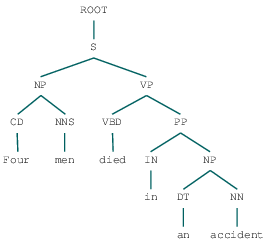

In [8]:
parse.get_constituency_tree(sentence)